## Assignment 10

#### Clean data, before running further simulations

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
import numpy as np

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:]

def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonZeroMask = csv[a, :]

synDividedMask = np.divide(nonZeroMask[:,4],nonZeroMask[:,3])
synDividedMask = synDividedMask * (64**3)
accurateDataT = np.vstack((nonZeroMask[:,0],nonZeroMask[:,1],nonZeroMask[:,2],synDividedMask))
accurateData = accurateDataT.T

cleaned = accurateData[accurateData[:,0] >= 409]
cleaned = cleaned[cleaned[:,0] <= 3529]
cleaned = cleaned[cleaned[:,1] >= 1564]
cleaned = cleaned[cleaned[:,1] <= 3124]

length, width = cleaned.shape
print length
print width

36036
4


### 1) Find trend of increasing density with more partitions

(80, 40, 10)
(80, 40, 10)
(80, 40, 10)


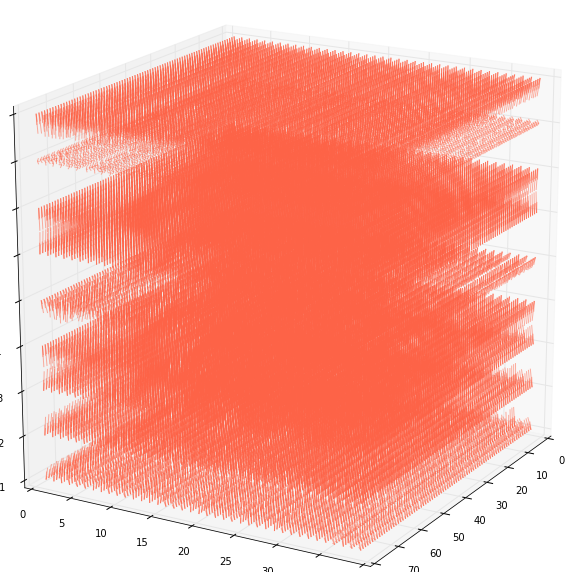

In [2]:
#looking at change in synapse density across unique sections of x,y,z
unique_x = np.unique(cleaned[:,0])
unique_y = np.unique(cleaned[:,1])
unique_z = np.unique(cleaned[:,2])
x_vals = [0] * len(unique_x)
y_vals = [0] * len(unique_y)
z_vals = [0] * len(unique_z)
for i in range(0,len(unique_x)):
    x_vals[i] = cleaned[cleaned[:,0] == unique_x[i]]
    x_vals[i] = np.mean(x_vals[i][:,3])
for i in range(0,len(unique_y)):
    y_vals[i] = cleaned[cleaned[:,1] == unique_y[i]]
    y_vals[i] = np.mean(y_vals[i][:,3])
for i in range(0,len(unique_z)):
    z_vals[i] = cleaned[cleaned[:,2] == unique_z[i]]
    z_vals[i] = np.mean(z_vals[i][:,3])

#generate vector components
x_less = x_vals[1:]
x_vals = x_vals[:len(x_vals)-1]
x_diffs = np.subtract(x_vals,x_less)
y_less = y_vals[1:]
y_vals = y_vals[:len(y_vals)-1]
y_diffs = np.subtract(y_vals,y_less)
z_less = z_vals[1:]
z_vals = z_vals[:len(z_vals)-1]
z_diffs = np.subtract(z_vals,z_less)

x_mat = np.tile(x_diffs, (len(y_vals),1))
x_mat = np.tile(x_mat, (10,1,1))
x_mat = np.transpose(x_mat)
print x_mat.shape
y_mat = np.tile(y_diffs, (len(x_vals),1))
y_mat = np.transpose(y_mat)
y_mat = np.tile(y_mat, (10,1,1))
y_mat = np.transpose(y_mat)
print y_mat.shape
z_mat = np.tile(z_diffs, (len(y_vals),1))
z_mat = np.tile(z_mat, (len(x_vals),1,1))
print z_mat.shape


x, y, z  = np.meshgrid(np.arange(1, len(x_diffs)), np.arange(1, len(y_diffs)), np.arange(1, len(z_diffs)))
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
u = x_mat[x,y,z]
v = y_mat[x,y,z]
w = z_mat[x,y,z]
ax.quiver(x, y, z, u, v, w, length=.5, color="Tomato", alpha=.5, 
          arrow_length_ratio=.5)
ax.view_init(elev=18, azim=30) 
ax.dist = 8
plt.show()

### 2) Get vectorizations between clusters per z value

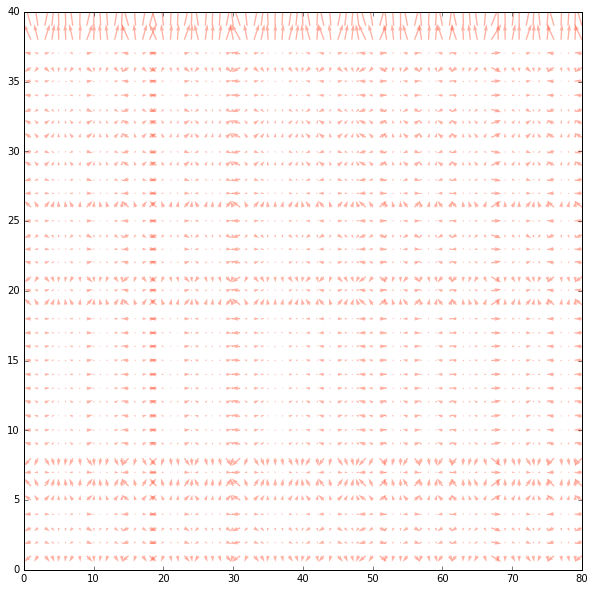

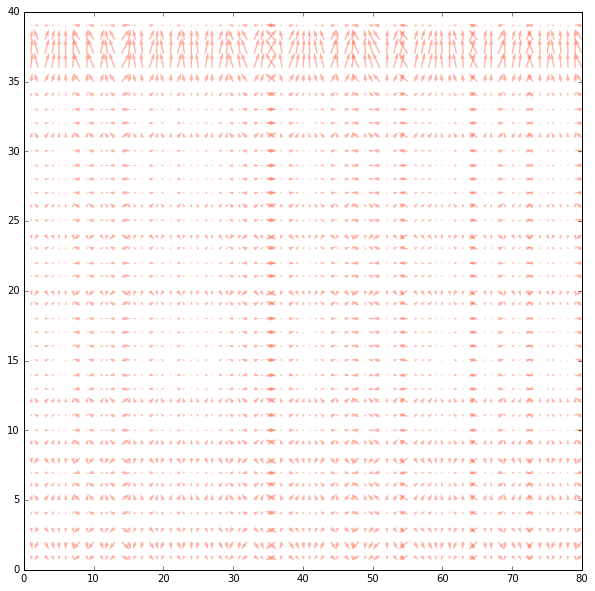

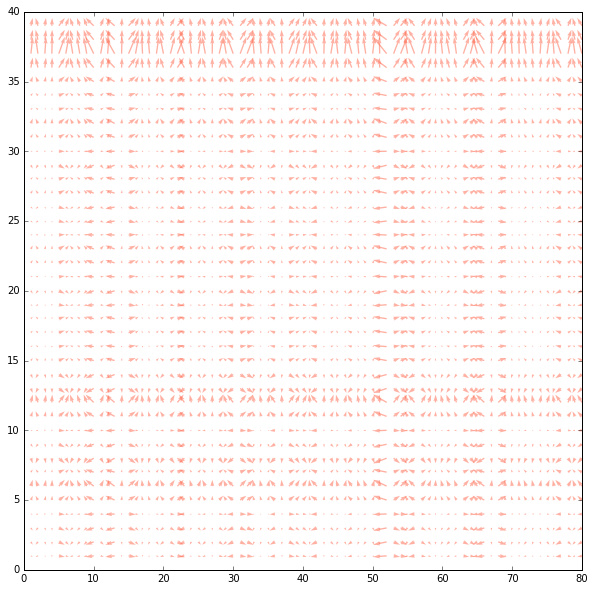

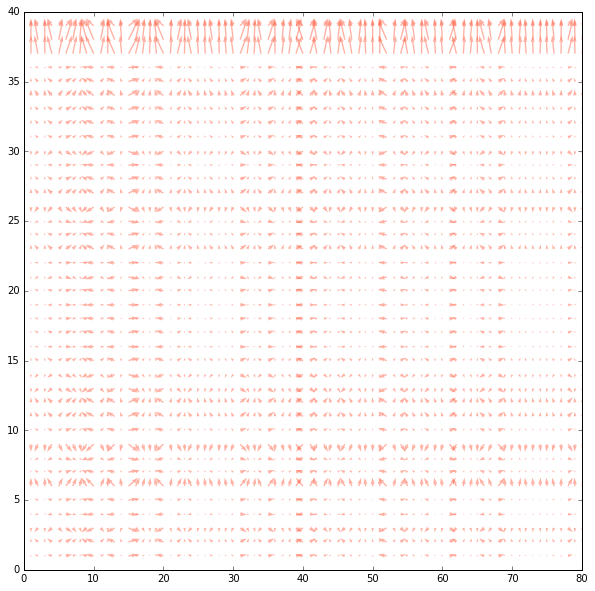

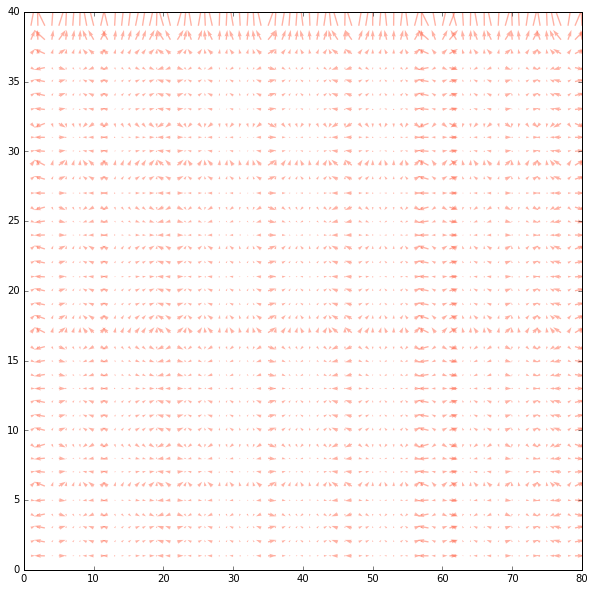

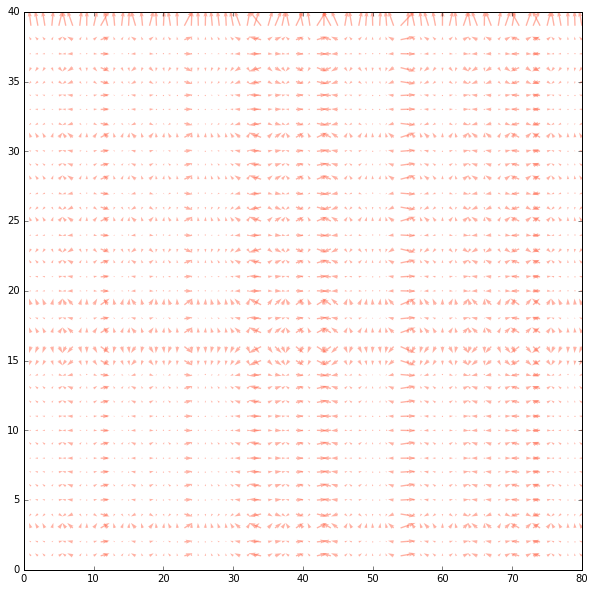

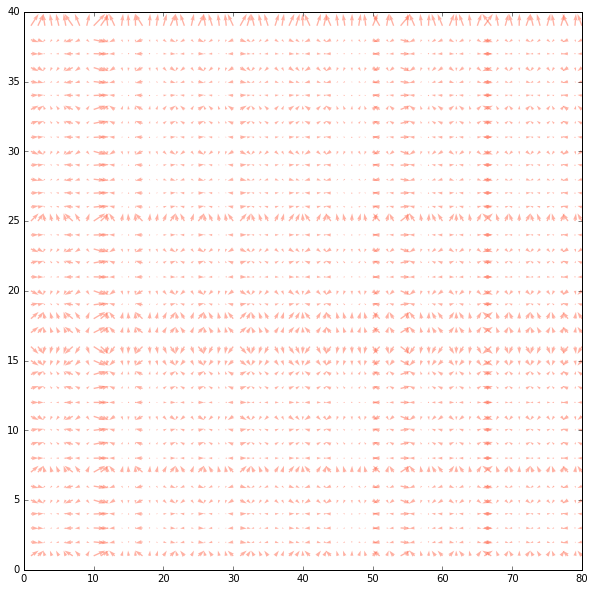

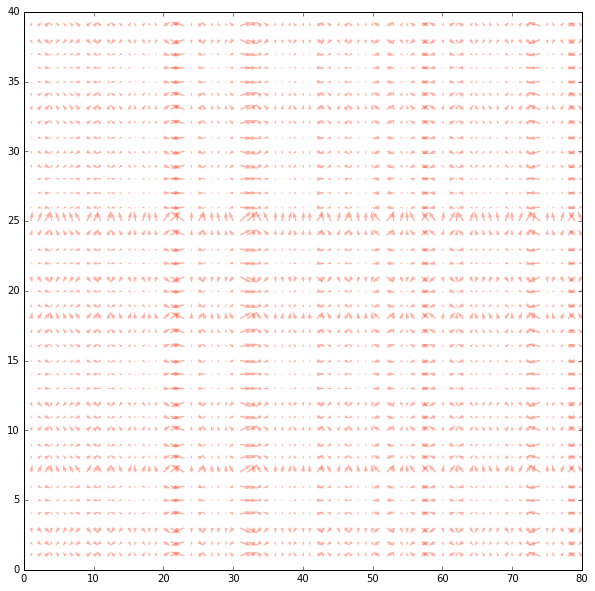

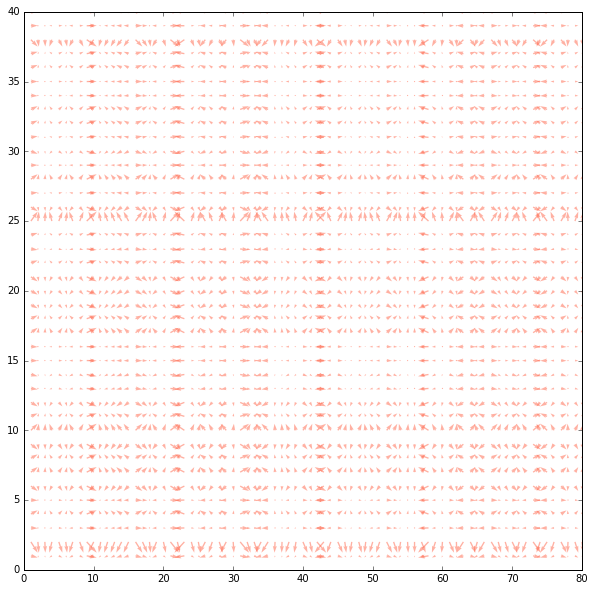

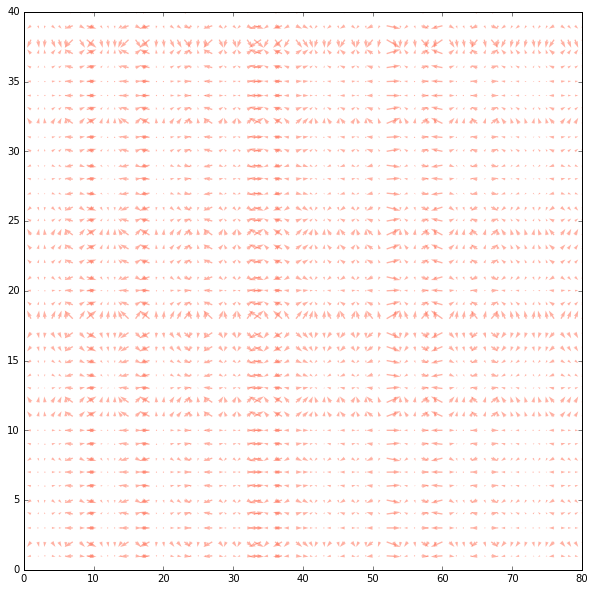

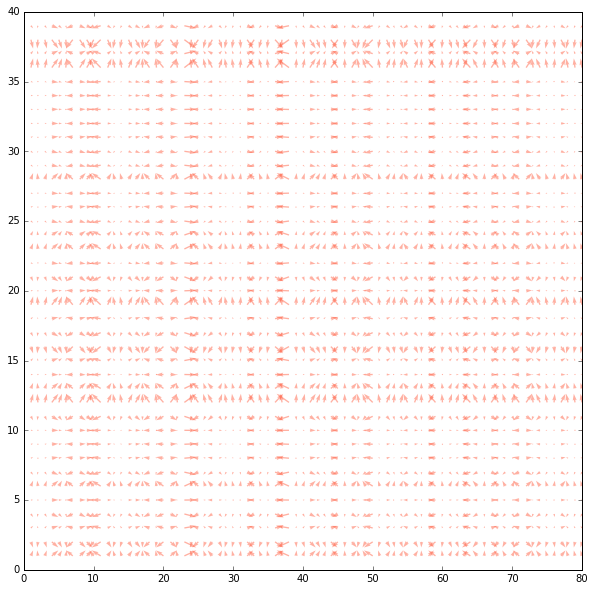

In [3]:
unique_z = np.unique(cleaned[:,2])
for d in unique_z:
    z_layer = cleaned[cleaned[:,2] == d]
    unique_x = np.unique(z_layer[:,0])
    unique_y = np.unique(z_layer[:,1])
    x_vals = [0] * len(unique_x)
    y_vals = [0] * len(unique_y)
    for i in range(0,len(unique_x)):
        x_vals[i] = z_layer[z_layer[:,0] == unique_x[i]]
        x_vals[i] = np.mean(x_vals[i][:,3])
    for i in range(0,len(unique_y)):
        y_vals[i] = z_layer[z_layer[:,1] == unique_y[i]]
        y_vals[i] = np.mean(y_vals[i][:,3])

    #generate vector components
    x_less = x_vals[1:]
    x_vals = x_vals[:len(x_vals)-1]
    x_diffs = np.subtract(x_vals,x_less)
    y_less = y_vals[1:]
    y_vals = y_vals[:len(y_vals)-1]
    y_diffs = np.subtract(y_vals,y_less)
    x_diffs = np.array(x_diffs)
    y_diffs = np.array(y_diffs)
    
    x_mat = np.tile(x_diffs, (len(y_diffs),1))
    x_mat = np.transpose(x_mat)
    y_mat = np.tile(y_diffs, (len(x_diffs),1))
    
    x, y = np.meshgrid(np.arange(1, len(x_diffs)+1), np.arange(1, len(y_diffs)+1), indexing='ij')
    fig = plt.figure(figsize=(10, 10))
    # ax = fig.gca(projection='2d')
    u = x_mat
    v = y_mat
    plt.quiver(x, y, u, v, color="Tomato", alpha=.5)
    # ax.view_init(elev=18, azim=30) 
    # ax.dist = 8
    
plt.show()

### 3) Compare to other vectorizations made

It doesn't look like there is much correlation between the vector fields. I need to make the graphs cleaner to really tell, and even then I should review my method for generating the components of the vectors in the field.

### 4) BIC curve histograms

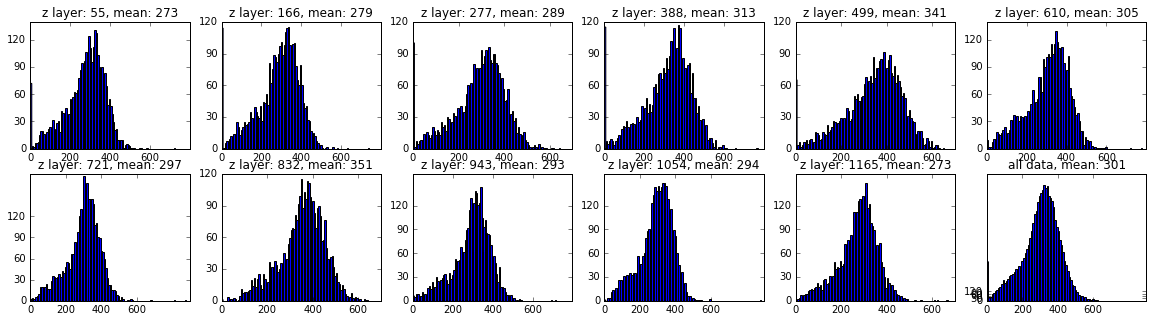

In [4]:
import math
divisions = np.unique(cleaned[:,2])
fig, ax = plt.subplots(2,6,figsize=(20,5))
for d in divisions:
    zval = int((d + 56)/111)
    ind = zval - 6
    if (ind < 0):
        xind = 0
        yind = ind + 5
    else:
        xind = 1
        yind = ind - 1
    if (ind == 0):
        xind = 0
    z_layer = cleaned[cleaned[:,2] == d]
    ax[xind][yind].hist(z_layer[:,3], bins = 100)
    title = 'z layer: ' + str(int(d)) + ', mean: ' + str(int(np.mean(z_layer[:,3])))
    ax[xind][yind].set_title(title)
    ax[xind][yind].set_yticks(np.arange(0,150,30))
    ax[xind][yind].set_xticks(np.arange(0,800,200))
    if (d == (11*111) - 56):
        ax[1][5].hist(cleaned[:,3], bins = 100)
        title = 'all data' + ', mean: ' + str(int(np.mean(cleaned[:,3])))
        ax[1][5].set_title(title)
        ax[1][5].set_yticks(np.arange(0,150,30))
        ax[1][5].set_xticks(np.arange(0,800,200))
plt.show()

### 5) K-means clustering on strange curves

(3157, 3)


//anaconda/lib/python2.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:722: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=277.0, top=277.0
  'bottom=%s, top=%s') % (bottom, top))


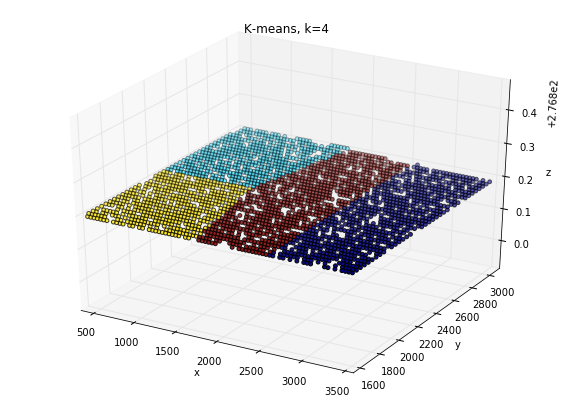

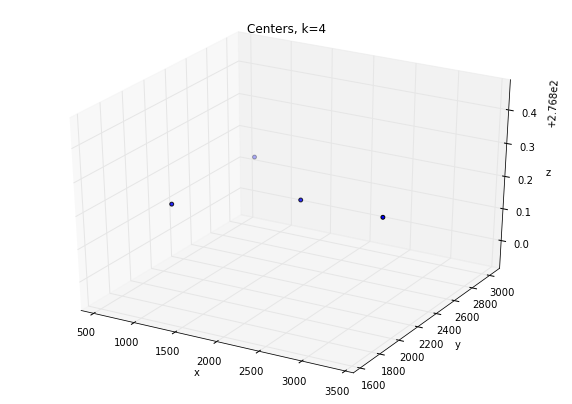

(3319, 3)


//anaconda/lib/python2.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:722: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=499.0, top=499.0
  'bottom=%s, top=%s') % (bottom, top))


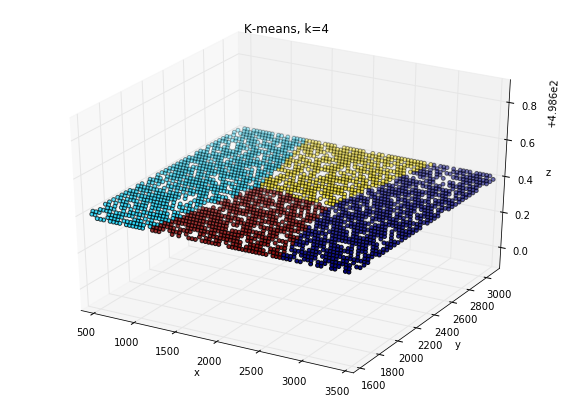

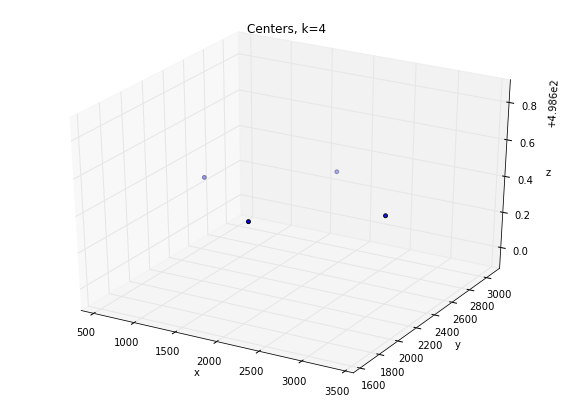

(3321, 3)


//anaconda/lib/python2.7/site-packages/mpl_toolkits/mplot3d/axes3d.py:722: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=610.0, top=610.0
  'bottom=%s, top=%s') % (bottom, top))


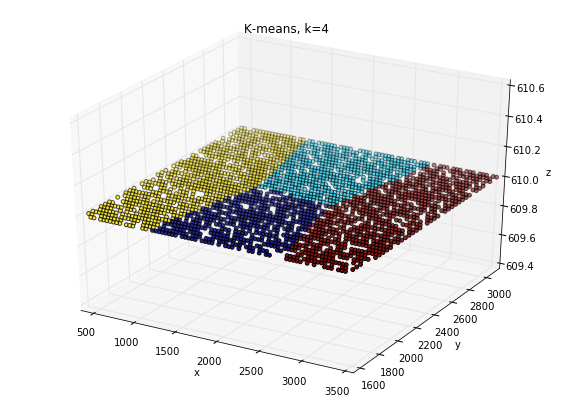

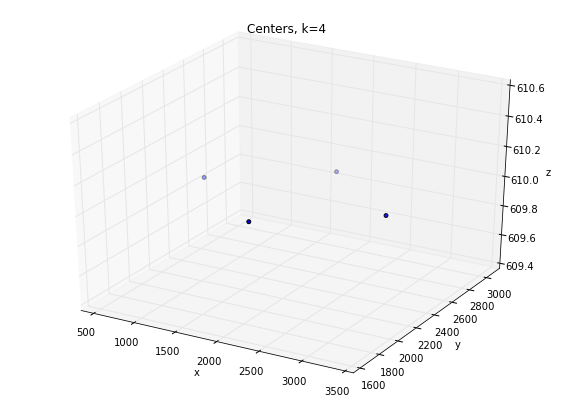

In [5]:
z_layer = [0] * 3
i = 0
import sklearn.cluster as cluster

for d in (222 + 55,444 + 55,555 + 55):
    z_layer = cleaned[cleaned[:,2] == d]
    xyz_only = z_layer[:,[0,1,2]]
    print xyz_only.shape
    def graph_cluster(xyz_only, clusters, centers, k):
        # randomly sample
        samples = 2500
        perm = np.random.permutation(xrange(1, len(xyz_only[:])))
        xyz_only = xyz_only[perm[:samples]]
        clusters = clusters[perm[:samples]]

        # get range for graphing
        mins = [np.amin(xyz_only[:, i]) for i in xrange(3)]
        maxs = [np.amax(xyz_only[:, i]) for i in xrange(3)]

        # following code adopted from
        # https://www.getdatajoy.com/examples/python-plots/3d-scatter-plot
        fig = plt.figure(figsize=(10, 7))
        ax = fig.gca(projection='3d')

        ax.set_title('K-means, k='+str(k))
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        ax.set_xlim(mins[0], maxs[0])
        ax.set_ylim(mins[1], maxs[1])
        ax.set_zlim(mins[2], maxs[2])

        ax.view_init()
        ax.dist = 10  # distance

        ax.scatter(
                   xyz_only[:, 0], xyz_only[:, 1], xyz_only[:, 2],  # data
                   c=clusters,  # marker colour
                   marker='o',  # marker shape
                   s=15  # marker size
        )

        plt.show()

        fig = plt.figure(figsize=(10, 7))
        ax = fig.gca(projection='3d')
        ax.set_title('Centers, k='+str(k))
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        ax.set_xlim(mins[0], maxs[0])
        ax.set_ylim(mins[1], maxs[1])
        ax.set_zlim(mins[2], maxs[2])

        ax.view_init()
        ax.dist = 10  # distance

        ax.scatter(
               centers[:, 0], centers[:, 1], centers[:, 2],  # data
               c='blue',  # marker colour
               marker='o',  # marker shape
               s=15  # marker size
        )
        plt.show()

    n_clusters = 4
    kmeans_algo = cluster.KMeans(n_clusters=n_clusters)
    clusters = kmeans_algo.fit_predict(xyz_only)
    centers = kmeans_algo.cluster_centers_
    #print centers
    graph_cluster(xyz_only, clusters, centers, n_clusters)